# Picks and slopes analysis

This notebook is a draft for a function that reads a xlsx file and returns the (negative) picks and slopes between them.

Programmer: Eric Araujo

Date of Creation: 01/11/2018

Date of last update: 04/11/2018

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
#import xlrd
import sklearn
from sklearn.linear_model import LinearRegression

import linear_regression as lr

%matplotlib inline

In [3]:
data = pd.read_csv('Serie_01.csv')

In [4]:
data.head()

,Storage time,UF TMP
0,3/10/14 00:00,-0.0155
1,3/10/14 00:00,-0.0157
2,3/10/14 00:00,-0.0157
3,3/10/14 00:01,-0.0155
4,3/10/14 00:01,-0.0162


In [5]:
data['Storage time'].head()

0    3/10/14 00:00
1    3/10/14 00:00
2    3/10/14 00:00
3    3/10/14 00:01
4    3/10/14 00:01
Name: Storage time, dtype: object

In [6]:
data.index = data['Storage time']
data['UF TMP'] = -data['UF TMP']

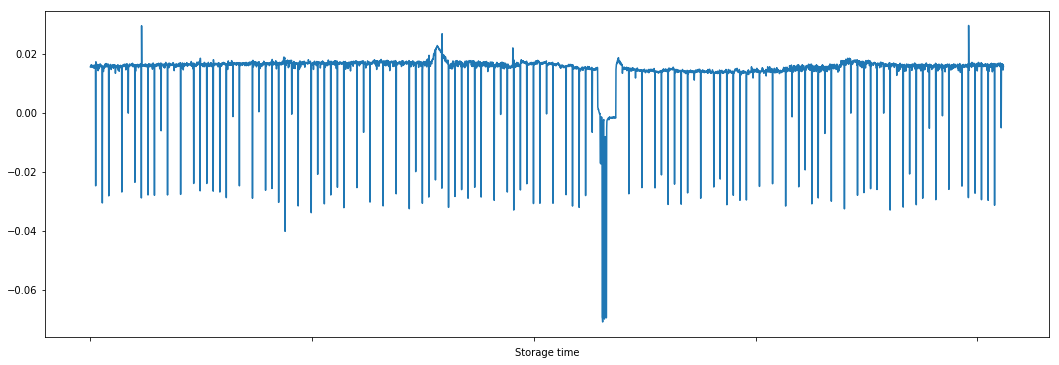

In [7]:
data['UF TMP'].plot(figsize=((18,6)))

In [8]:
import peak_detection as peak

(-1.5, 1.5)

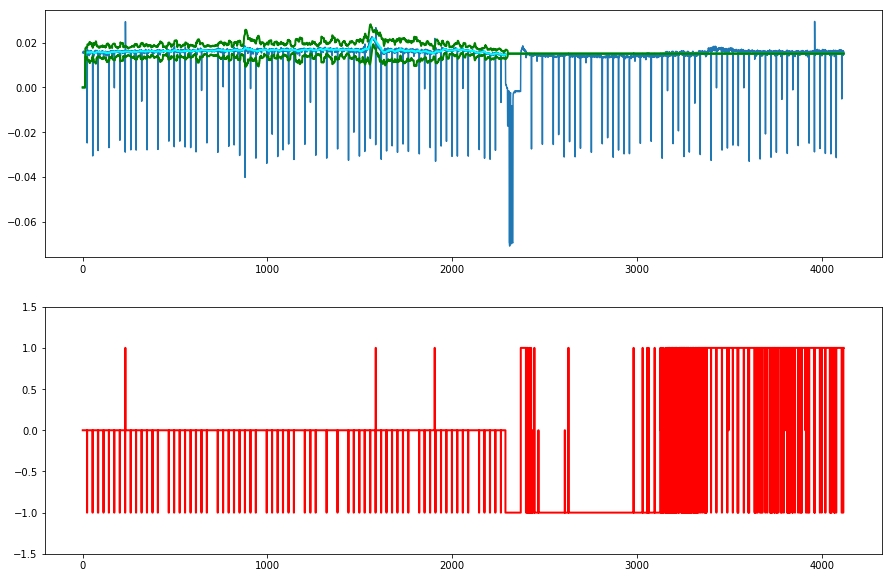

In [9]:
# Data
y = np.array([1,1,1.1,1,0.9,1,1,1.1,1,0.9,1,1.1,1,1,0.9,1,1,1.1,1,1,1,1,1.1,0.9,1,1.1,1,1,0.9,
      1,1.1,1,1,1.1,1,0.8,0.9,1,1.2,0.9,1,1,1.1,1.2,1,1.5,1,3,2,5,3,2,1,1,1,0.9,1,1,3,
      2.6,4,3,3.2,2,1,1,0.8,4,4,2,2.5,1,1,1])

y = np.array(data['UF TMP'])

# Settings: lag = 30, threshold = 5, influence = 0
lag = 15
threshold = 7
influence = 0

# Run algo with settings from above
result = peak.thresholding_algo(y, lag=lag, threshold=threshold, influence=influence)

# Plot result
plt.figure(figsize=((15,10)))
plt.subplot(211)

plt.plot(np.arange(1, len(y)+1), y)

plt.plot(np.arange(1, len(y)+1),
           result["avgFilter"], color="cyan", lw=2)

plt.plot(np.arange(1, len(y)+1),
           result["avgFilter"] + threshold * result["stdFilter"], color="green", lw=2)

plt.plot(np.arange(1, len(y)+1),
           result["avgFilter"] - threshold * result["stdFilter"], color="green", lw=2)

plt.subplot(212)
plt.step(np.arange(1, len(y)+1), result["signals"], color="red", lw=2)
plt.ylim(-1.5, 1.5)



In [10]:
data['signals'] = result["signals"]

In [11]:
# Groups is an array containing the info about each group in the system. If group == 'N', 
# it means it is a divisor of groups. The idea is that each peak separates a group from another group.
groups = []
counter = 1
for index, row in data.iterrows():
    if row['signals'] == 0:
        groups.append(counter)
    else:
        groups.append(-1)
        counter = counter + 1
data['group'] = groups

In [12]:
# List of groups existent in the dataframe
list_of_groups = list(set(data.group) - {-1})

In [62]:
#for group in list_of_groups:
lm = LinearRegression()
#subdata = data[data.group == group]
subdata = data[data.group == 1]
    

In [32]:
# Adjusting date time to linear regression
idx = subdata.index.factorize()[0].reshape(-1,1)

In [44]:
idx_ = np.arange(len(subdata.index)).reshape(-1,1)
idx_

array([[ 0],
       [ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12],
       [13],
       [14],
       [15],
       [16],
       [17],
       [18],
       [19],
       [20],
       [21],
       [22],
       [23]])

In [45]:
lm.fit(idx_, subdata['UF TMP'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [46]:
LinearRegression(copy_X=True, fit_intercept=True, normalize=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [47]:
lm.coef_, lm.intercept_

(array([-2.76308696e-06]), 0.015676563)

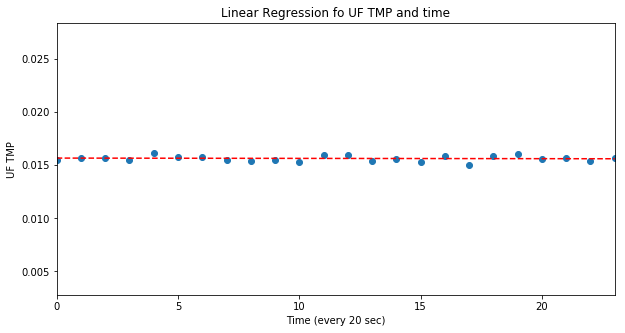

In [59]:
plt.figure(figsize=((10,5)))
plt.xlim(0,idx_[-1])
plt.scatter(idx_, subdata['UF TMP'])
plt.xlabel('Time (every 20 sec)')
plt.ylabel('UF TMP')
plt.title('Linear Regression fo UF TMP and time')
# Prediction plot
plt.plot(idx_, lm.predict(idx_), "r--")


In [63]:
coef_lr = {}
for group in list_of_groups:
    lr_idx = lr.linear_regression(data, group)
    coef_lr[group] = {'a': lr_idx[0], 'intercept' : lr_idx[1]}

In [66]:
pd.DataFrame(coef_lr).T

,a,intercept
1,[-2.7630869565217735e-06],0.0156766
2,[6.331133004926138e-06],0.0156765
3,[3.876499726327315e-05],0.0151839
5,[9.3846743295019e-06],0.0156102
6,[7.2349753694581695e-06],0.0154058
7,[1.0926327312534242e-05],0.0157175
8,[7.6997536945813e-06],0.0159
9,[1.890426929392448e-05],0.0156588
11,[-3.8005199781061948e-06],0.016007
12,[-1.4882320744389993e-06],0.0159865
